In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))

The previous part of this notebook is available at: <br>
https://github.com/Hassi34/TimeSeriesAnalysis/blob/main/TimeSeriesAnalysis0.ipynb

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pylab
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA 
from scipy.stats.distributions import chi2
sns.set()

## Preprocessing

In [3]:
def LLR_Test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [38]:
raw_csv_data = pd.read_csv("Index2018.csv")

df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst= True )
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse
del df_comp['spx'], df_comp['dax'], df_comp['nikkei'], df_comp['ftse']

size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]
df.shape, df_test.shape

((5021, 1), (1256, 1))

In [39]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:] # have to start from the first index to calculate the change as there will be no previous value for the 0th index
df

,market_value,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842
...,...,...
2013-04-01,6411.74,0.000000
2013-04-02,6490.66,1.230867
2013-04-03,6420.28,-1.084327


## Simple AR for Returns

In [40]:
model_ar1 = ARMA(df.returns, order=(1,0))
results_ar1 = model_ar1.fit()
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sat, 21 Aug 2021   AIC                          15865.497
Time:                        09:24:53   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

As both the p-values show the insignificance, we would try using the higher Lags for AR Model

## Higher Lags AR Models for Returns

In [41]:
model_ar2 = ARMA(df.returns, order=(2,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sat, 21 Aug 2021   AIC                          15854.911
Time:                        09:24:54   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [42]:
LLR_Test(model_ar1, model_ar2) #So, this model is a better fit then the previous model

0.0

In [43]:
model_ar3 = ARMA(df.returns, order=(3,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Sat, 21 Aug 2021   AIC                          15823.477
Time:                        09:24:55   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.792      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9233           -2.0210j            2.2219           -0.1818
AR.2            0.9233           +2.0210j            2.2219            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [44]:
LLR_Test(model_ar2, model_ar3) #Again, this model is also signifinicantly better 
# The information criteria(AIC, BIC, HQIC) for model 3 is lower than the model 2 which concludes that the model 3 outperforms model 2 

0.0

In [45]:
model_ar4 = ARMA(df.returns, order = (4,0))
result_ar4 = model_ar4.fit() 
print(result_ar4.summary())
print(f"LLR Test p-value : {LLR_Test(model_ar3, model_ar4)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sat, 21 Aug 2021   AIC                          15814.661
Time:                        09:24:56   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     

In [46]:
model_ar5 = ARMA(df.returns, order = (5,0))
result_ar5 = model_ar5.fit() 
print(result_ar5.summary())
print(f"LLR Test p-value : {LLR_Test(model_ar4, model_ar5)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sat, 21 Aug 2021   AIC                          15798.779
Time:                        09:24:56   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     

In [47]:
model_ar6 = ARMA(df.returns, order = (6,0))
result_ar6 = model_ar6.fit() 
print(result_ar6.summary())
print(f"LLR Test p-value : {LLR_Test(model_ar5, model_ar6)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 21 Aug 2021   AIC                          15789.890
Time:                        09:24:57   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     

In [48]:
model_ar7 = ARMA(df.returns, order = (7,0))
result_ar7 = model_ar7.fit() 
print(result_ar7.summary())
print(f"LLR Test p-value : {LLR_Test(model_ar6, model_ar7)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 21 Aug 2021   AIC                          15791.294
Time:                        09:24:58   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     

Since both the tests has been failed we will opt for the simpler model which is `model_ar6`

## Normalizing Values

In [49]:
benchmark = df.market_value.iloc[0]
df['norm'] = df.market_value.div(benchmark).mul(100)
df

,market_value,returns,norm
date,,,
1994-01-10,3440.58,-0.156704,100.000000
1994-01-11,3413.77,-0.779229,99.220771
1994-01-12,3372.02,-1.222988,98.007313
1994-01-13,3360.01,-0.356166,97.658244
1994-01-14,3400.56,1.206842,98.836824
...,...,...,...
2013-04-01,6411.74,0.000000,186.356370
2013-04-02,6490.66,1.230867,188.650169
2013-04-03,6420.28,-1.084327,186.604584


In [50]:
adfuller(df.norm) #p= 0.33 explains the non stationarity

(-1.8928710132672346,
 0.3354222074330073,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

In [51]:
#Let's normalize the returns 
benchmark_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(benchmark_ret).mul(100)
adfuller(df.norm_ret) # This data is stationary with great certainty 

(-12.770265719497209,
 7.798058336039225e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 80114.49116124898)

So, Here we can conclude that the normalizing does not effect staionarity

## Fitting and evaluating the AR Models for normalized return 

In [52]:
model_ar1 = ARMA(df.norm_ret, order = (1,0))
result_ar1 = model_ar1.fit() 
print(result_ar1.summary())

                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -40351.743
Method:                       css-mle   S.D. of innovations            749.388
Date:                Sat, 21 Aug 2021   AIC                          80709.487
Time:                        09:25:17   BIC                          80729.050
Sample:                    01-10-1994   HQIC                         80716.342
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731     10.339     -1.158      0.247     -32.237       8.291
ar.L1.norm_ret    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    

In [53]:
model_ar2 = ARMA(df.norm_ret, order = (2,0))
result_ar2 = model_ar2.fit() 
print(result_ar2.summary())
print(f"LLR Test p-value : {LLR_Test(model_ar1, model_ar2)}")

                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -40345.450
Method:                       css-mle   S.D. of innovations            748.449
Date:                Sat, 21 Aug 2021   AIC                          80698.901
Time:                        09:25:20   BIC                          80724.985
Sample:                    01-10-1994   HQIC                         80708.041
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      9.834     -1.218      0.223     -31.247       7.301
ar.L1.norm_ret    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.norm_ret    -0.0500      0.014

The normalized values are giving the exact same p values as their non-normal version, Hence we conclude that the normalizing is not making a significant impact

## Analyizng the Residuals

#### Residuals of Returns

In [58]:
df['res_ret'] = model_ar6.fit().resid
df.res_ret.mean(), df.res_ret.var() #Mean close to 0 and variance around 1 depicts that our choice of model is pretty good

(-5.3732424679065846e-05, 1.3559802110725088)

In [59]:
adfuller(df.res_ret) #Data is stationary which means that the white noise is stationary

(-70.78380044341453,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570834419676)

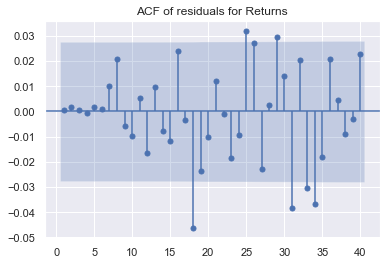

In [60]:
sgt.plot_acf(df.res_ret, zero=False, lags=40)
plt.title("ACF of residuals for Returns")
plt.show()

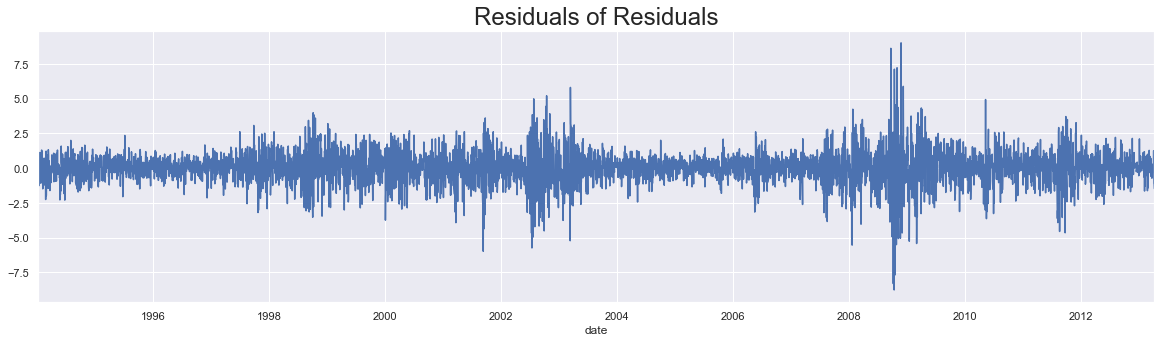

In [61]:
df.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Residuals", size=24)
plt.show()                                #It seems to be random, which favours our model